## import the required librery

In [163]:
import pandas as pd
import numpy as np

#importing libraries for visualization
import matplotlib.pyplot as plt # for data visualization & graphical plotting 
import seaborn as sns #for statistical graphics
%matplotlib inline

from sklearn.model_selection import train_test_split #for splitting the data into train and test


## for standardize and Encoding the data
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error

## Mount the drive

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the data

In [165]:
data = pd.read_csv("/content/drive/MyDrive/Turingminds/Neural_networks/DNN_activity_customer_data/CustomerData.csv")

## EDA

In [166]:
data.shape

(3209, 14)

In [167]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrequencyOfPurchase', 'NoOfUnitsPurchased',
       'FrequencyOfPlay', 'NoOfGamesPlayed', 'NoOfGamesBought',
       'FavoriteChannelOfTransaction', 'FavoriteGame',
       'TotalRevenueGenerated'],
      dtype='object')

In [168]:
#checking the top 5 records
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOfPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [169]:
# checking the last 5 records
data.tail()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOfPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
3204,4205,1,2,4,6,365,16,16,827,78,16,Favorite,Uniform,132.50
3205,4206,1,2,2,5,348,20,20,2933,294,13,Favorite,Uniform,223.23
3206,4207,1,2,5,7,341,16,13,1250,126,16,Uniform,Uniform,120.00
3207,4208,1,2,6,7,368,18,14,1364,122,18,Favorite,Uniform,161.50
3208,4209,1,3,2,6,389,25,17,475,111,25,Favorite,Uniform,137.50


In [170]:
# checking the uniqueness of the data
data.nunique()

CustomerID                      3209
City                               2
NoOfChildren                      10
MinAgeOfChild                     18
MaxAgeOfChild                     22
Tenure                           367
FrequencyOfPurchase               66
NoOfUnitsPurchased                56
FrequencyOfPlay                 2089
NoOfGamesPlayed                  366
NoOfGamesBought                   61
FavoriteChannelOfTransaction       2
FavoriteGame                       2
TotalRevenueGenerated           1672
dtype: int64

In [171]:
# checking the data_types of each attributes
data.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrequencyOfPurchase               int64
NoOfUnitsPurchased                int64
FrequencyOfPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

In [172]:
# drop the "CustomerID" as it's not necessary as it has 3209 unique I'D
data.drop(['CustomerID'],axis=1,inplace=True)

In [173]:
# cheking the shape of the dataset after dropping the "CustomerID"
data.shape

(3209, 13)

In [174]:
# Converting all attribute to appropriate type 
col=["City","FavoriteChannelOfTransaction","FavoriteGame"]
data[col]=data[col].astype("category")

In [175]:
# after converting all the attributes to appropriate type checking the data types
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrequencyOfPurchase                int64
NoOfUnitsPurchased                 int64
FrequencyOfPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [176]:
# checking the summary statistic of the data
data.describe()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOfPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


In [177]:
# checking the summary statistic for categorical attributes as well
data.describe(include="all")

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOfPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,2843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,NaN,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,NaN,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,NaN,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,NaN,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,NaN,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,NaN,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


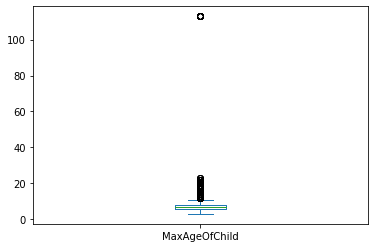

In [178]:
# checking the outliers in the column namely "MaxAgeOfChild"
data['MaxAgeOfChild'].plot(kind='box')

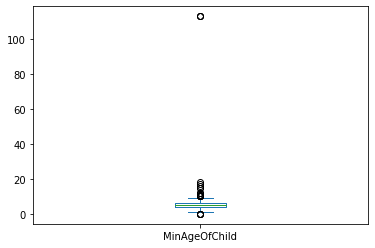

In [179]:
# checking the outliers in the column namely "MinAgeOfChild"
data['MinAgeOfChild'].plot(kind='box')

In [180]:
# Checking how many records are wrongly given in the column namely "MinAgeOfChild" & "MaxAgeOfChild"
data.loc[(data['MinAgeOfChild']==113)|(data["MaxAgeOfChild"]==113)].value_counts().sum()

20

In [181]:
# removing the records which are given wrongly in the dataset
data=data.loc[(data['MinAgeOfChild']!=113)&(data['MaxAgeOfChild']!=113),:]

In [182]:
# checking the shape of the data set after removing the outliers
data.shape

(3189, 13)

In [183]:
# Checking if there are any missing values or not
data.isnull().sum()
# OR
#data.info()

City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrequencyOfPurchase             0
NoOfUnitsPurchased              0
FrequencyOfPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In [184]:
# select the caterigorical attributes and stored in variable namely cat_cols
cat_cols = data.select_dtypes(include=["category"]).columns

In [185]:
# converting the categorical attributes into machine understandable language string to nemeric
data = pd.get_dummies(columns=cat_cols,data=data,prefix=cat_cols,prefix_sep="_",drop_first=True)

## split the data into train and test

In [186]:
X = data.drop("TotalRevenueGenerated",axis=1)
y = data["TotalRevenueGenerated"]

X_train, X_test, y_train, y_test =train_test_split(X ,y ,test_size=0.30, random_state=5271)

In [187]:
# checking the dimension of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2232, 12)
(957, 12)
(2232,)
(957,)


In [188]:
# Standardize the numeric attributes
scaler = StandardScaler()
X_train[["NoOfChildren","MinAgeOfChild","MaxAgeOfChild","Tenure","FrequencyOfPurchase","NoOfUnitsPurchased","FrequencyOfPlay","NoOfGamesPlayed","NoOfGamesBought"]] =scaler.fit_transform(X_train[["NoOfChildren","MinAgeOfChild","MaxAgeOfChild","Tenure","FrequencyOfPurchase","NoOfUnitsPurchased","FrequencyOfPlay","NoOfGamesPlayed","NoOfGamesBought"]])
X_test[["NoOfChildren","MinAgeOfChild","MaxAgeOfChild","Tenure","FrequencyOfPurchase","NoOfUnitsPurchased","FrequencyOfPlay","NoOfGamesPlayed","NoOfGamesBought"]] =scaler.transform(X_test[["NoOfChildren","MinAgeOfChild","MaxAgeOfChild","Tenure","FrequencyOfPurchase","NoOfUnitsPurchased","FrequencyOfPlay","NoOfGamesPlayed","NoOfGamesBought"]])

## Neural Networks Lab Activity

**1) What is the difference between Artificial Neural Networks and Deep Neural Network ?**

ANS : 

   Artificial Neural Networks (ANNs) are a type of machine learning algorithm   modeled on the biological neurons in the brain. They are used to approximate complex functions, learn patterns from data, and classify data. Deep Neural Networks (DNNs) are a type of Artificial Neural Network that includes multiple layers of neurons, allowing for more complex and efficient learning. DNNs are capable of learning more complex patterns, and are better at generalizing from data.

**2) What is an Epoch ?**

ANS :

 An epoch is a single pass through all of the training data in a neural network. It is used to measure the performance of the network on the training set. After each epoch, the weights and bias values in the network are adjusted to minimize the error. The number of epochs needed to train a network is dependent on the complexity of the data and the desired accuracy.

**3) What are the 3 issues with more layers?**

ANS :
* **Vanishing Gradient Problem:** As the number of layers in a DNN increases, the gradient of the error with respect to the weights decreases exponentially. This makes it difficult for the network to learn from the data.

* **Overfitting:** As the number of layers and parameters in a DNN increases, the network has an increased tendency to overfit to the training data. This means that the network will have good performance on the training data, but not on the test data.

* **Computational Complexity:** As the number of layers in a DNN increases, the computational complexity increases exponentially. This can make training and inference with DNNs computationally expensive.






**4) What are the Disadvantages with Deep Learning ?**

ANS: 

* **Expensive Computation:** Deep learning requires large amounts of data and computationally expensive operations. This can make training and inference with deep learning expensive in terms of cost and time.

* **Lack of Interpretability:** Deep learning models are often considered black boxes, as they are very difficult to interpret and explain. This can make it difficult to understand why a model is making certain decisions.

* **Difficulty in Tuning Hyperparameters:** Deep learning models often require a large number of hyperparameters to be tuned for optimal performance. This can be a time-consuming task and can require a lot of trial and error.






**5) How to Deal with Class Imbalance?**

ANS : 
* **Weighted Loss:** Use weighted loss functions to give more importance to the minority classes.
* **Use Pre-trained Models:** Use pre-trained models to initialize the weights of the network and to transfer knowledge from related tasks.

* **Use Data Augmentation:** Use data augmentation techniques such as flipping and rotating images to create more data points of the minority classes.






## Model Building

## 1. Experiment with optimizer SGD with 3 momentum values and report the results [0.01, 0.001, 0.0001].

In [189]:
## importing the libreries for model building
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD ,RMSprop,Adam

In [190]:
from sklearn import metrics 
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAE_Test','MSE_Test','RMSE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

**optimizer SGD with momentum 0.01**

In [191]:
model=Sequential()

model.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(1,activation='linear'))

In [192]:
# optimizer SGD with momentum 0.01
model.compile(optimizer=SGD(momentum=0.01),loss = 'mse',metrics=['mse'])

In [193]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 97461.6953 - mse: 97461.6953
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 7011.5986 - mse: 7011.5986
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 7094.6475 - mse: 7094.6475
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 7066.4849 - mse: 7066.4849
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: 6959.8311 - mse: 6959.8311
Epoch 6/100
70/70 [==============================] - 1s 8ms/step - loss: 6097.5220 - mse: 6097.5220
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 4953.9351 - mse: 4953.9351
Epoch 8/100
70/70 [==============================] - 1s 8ms/step - loss: 4475.4004 - mse: 4475.4004
Epoch 9/100
70/70 [==============================] - 1s 7ms/step - loss: 4441.6899 - mse: 4441.6899
Epoch 10/100
70/70 [==============================] - 1s 8ms/step - loss: 3671.5559 - mse: 3671.55

In [194]:
sgd_train_pred = model.predict(X_train)
sgd_test_pred = model.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [195]:
print("MSE_train" , metrics.mean_squared_error(y_train,sgd_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,sgd_test_pred))

MSE_train 3079.6715993873213
MSE_test 2769.8650132010143


In [196]:
scores = get_metrics(y_train,model.predict(X_train),y_test,model.predict(X_test),'SGD_with_momentum 0.01',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.65819,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.55057


**optimizer SGD with momentum 0.001**

In [197]:
model1=Sequential()

model1.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model1.add(Dense(500, activation='sigmoid'))
model1.add(Dense(1,activation='linear'))

In [198]:
# optimizer SGD with momentum 0.001
model1.compile(optimizer=SGD(momentum=0.001),loss = 'mse',metrics=['mse'])

In [199]:
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 169786.0000 - mse: 169786.0000
Epoch 2/100
70/70 [==============================] - 1s 13ms/step - loss: 7085.4419 - mse: 7085.4419
Epoch 3/100
70/70 [==============================] - 1s 12ms/step - loss: 7024.2583 - mse: 7024.2583
Epoch 4/100
70/70 [==============================] - 1s 13ms/step - loss: 7112.3232 - mse: 7112.3232
Epoch 5/100
70/70 [==============================] - 1s 13ms/step - loss: 7046.2207 - mse: 7046.2207
Epoch 6/100
70/70 [==============================] - 1s 13ms/step - loss: 6933.4482 - mse: 6933.4482
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 6361.4673 - mse: 6361.4673
Epoch 8/100
70/70 [==============================] - 1s 8ms/step - loss: 6059.6694 - mse: 6059.6694
Epoch 9/100
70/70 [==============================] - 1s 8ms/step - loss: 5619.3438 - mse: 5619.3438
Epoch 10/100
70/70 [==============================] - 1s 8ms/step - loss: 5453.4214 - mse: 

In [200]:
sgd_train_pred1 = model1.predict(X_train)
sgd_test_pred1 = model1.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [201]:
print("MSE_train" , metrics.mean_squared_error(y_train,sgd_train_pred1))
print("MSE_test" , metrics.mean_squared_error(y_test,sgd_test_pred1))

MSE_train 4916.231274156287
MSE_test 4665.900012731052


In [202]:
scores = get_metrics(y_train,model1.predict(X_train),y_test,model1.predict(X_test),'SGD_with_momentum 0.001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552


**Optimizer SGD with momentum 0.0001**

In [203]:
model2=Sequential()

model2.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model2.add(Dense(500, activation='sigmoid'))
model2.add(Dense(1,activation='linear'))

In [204]:
# optimizer SGD with momentum 0.0001
model2.compile(optimizer=SGD(momentum=0.0001),loss = 'mse',metrics=['mse'])

In [205]:
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 7ms/step - loss: 382130.5000 - mse: 382130.5000
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 7140.2358 - mse: 7140.2358
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 7212.6816 - mse: 7212.6816
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 7143.9204 - mse: 7143.9204
Epoch 5/100
70/70 [==============================] - 1s 12ms/step - loss: 7115.2173 - mse: 7115.2173
Epoch 6/100
70/70 [==============================] - 1s 13ms/step - loss: 7265.6694 - mse: 7265.6694
Epoch 7/100
70/70 [==============================] - 1s 13ms/step - loss: 7337.1611 - mse: 7337.1611
Epoch 8/100
70/70 [==============================] - 1s 13ms/step - loss: 7210.6445 - mse: 7210.6445
Epoch 9/100
70/70 [==============================] - 1s 13ms/step - loss: 7270.7236 - mse: 7270.7236
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 7453.3931 - mse: 

In [206]:
sgd_train_pred2 = model2.predict(X_train)
sgd_test_pred2 = model2.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [207]:
print("MSE_train" , metrics.mean_squared_error(y_train,sgd_train_pred2))
print("MSE_test" , metrics.mean_squared_error(y_test,sgd_test_pred2))

MSE_train 20193.197613000888
MSE_test 19312.335789977966


In [208]:
scores = get_metrics(y_train,model2.predict(X_train),y_test,model2.predict(X_test),'SGD_with_momentum 0.0001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885


## 2. Experiment with optimizer with RMSProp with 3 learning rates values and report the results
[0.01, 0.001, 0.0001]

**optimizer RMSProp with learning rates 0.01**

In [209]:
model3=Sequential()

model3.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model3.add(Dense(500, activation='sigmoid'))
model3.add(Dense(1,activation='linear'))

In [210]:
# optimizer RMSProp with learning_rate 0.01
model3.compile(optimizer=RMSprop(learning_rate= 0.01),loss = 'mse',metrics=['mse'])

In [211]:
model3.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 12639.5586 - mse: 12639.5586
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 6885.8594 - mse: 6885.8594
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 5783.1611 - mse: 5783.1611
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 3607.8101 - mse: 3607.8101
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 2758.6414 - mse: 2758.6414
Epoch 6/100
70/70 [==============================] - 1s 15ms/step - loss: 2340.1936 - mse: 2340.1936
Epoch 7/100
70/70 [==============================] - 1s 15ms/step - loss: 2212.0747 - mse: 2212.0747
Epoch 8/100
70/70 [==============================] - 1s 15ms/step - loss: 2096.0264 - mse: 2096.0264
Epoch 9/100
70/70 [==============================] - 1s 15ms/step - loss: 2053.1968 - mse: 2053.1968
Epoch 10/100
70/70 [==============================] - 1s 11ms/step - loss: 2035.0853 - ms

In [212]:
rmsp_train_pred = model3.predict(X_train)
rmsp_test_pred = model3.predict(X_test)

30/30 [==============================] - 0s 5ms/step


In [213]:
print("MSE_train" , metrics.mean_squared_error(y_train,rmsp_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,rmsp_test_pred))

MSE_train 941.2570104516057
MSE_test 2201.1068040299565


In [214]:
scores = get_metrics(y_train,model3.predict(X_train),y_test,model3.predict(X_test),'RMSProp_with_lr 0.01',scores)

scores

30/30 [==============================] - 0s 5ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638


**optimizer RMSProp with learning_rate 0.001**

In [215]:
model4=Sequential()

model4.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model4.add(Dense(500, activation='sigmoid'))
model4.add(Dense(1,activation='linear'))

In [216]:
# optimizer RMSProp with learning_rate 0.001
model4.compile(optimizer=RMSprop(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [217]:
model4.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 27001.7324 - mse: 27001.7324
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 21455.0312 - mse: 21455.0312
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 16817.6836 - mse: 16817.6836
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 12922.3779 - mse: 12922.3779
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 9984.6514 - mse: 9984.6514
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 7988.2471 - mse: 7988.2471
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 7053.6890 - mse: 7053.6890
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 6566.0342 - mse: 6566.0342
Epoch 9/100
70/70 [==============================] - 1s 9ms/step - loss: 5885.6196 - mse: 5885.6196
Epoch 10/100
70/70 [==============================] - 1s 10ms/step - loss: 5368.6504 - m

In [218]:
rmsp_train_pred1 = model4.predict(X_train)
rmsp_test_pred1 = model4.predict(X_test)

30/30 [==============================] - 0s 5ms/step


In [219]:
print("MSE_train" , metrics.mean_squared_error(y_train,rmsp_train_pred1))
print("MSE_test" , metrics.mean_squared_error(y_test,rmsp_test_pred1))

MSE_train 1706.112127637086
MSE_test 1903.1645782726644


In [220]:
scores = get_metrics(y_train,model4.predict(X_train),y_test,model4.predict(X_test),'RMSProp_with_lr 0.001',scores)

scores

30/30 [==============================] - 0s 5ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019


**optimizer RMSProp with learning_rate 0.0001**

In [221]:
model5=Sequential()

model5.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model5.add(Dense(500, activation='sigmoid'))
model5.add(Dense(1,activation='linear'))

In [222]:
# optimizer RMSProp with learning_rate 0.0001
model5.compile(optimizer=RMSprop(learning_rate=0.0001),loss = 'mse',metrics=['mse'])

In [223]:
model5.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 2s 15ms/step - loss: 31778.3867 - mse: 31778.3867
Epoch 2/100
70/70 [==============================] - 1s 14ms/step - loss: 29770.0137 - mse: 29770.0137
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 29063.8242 - mse: 29063.8242
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 28473.7969 - mse: 28473.7969
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 27882.4473 - mse: 27882.4473
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 27268.2363 - mse: 27268.2363
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 26647.0723 - mse: 26647.0723
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 26014.3535 - mse: 26014.3535
Epoch 9/100
70/70 [==============================] - 1s 9ms/step - loss: 25384.6094 - mse: 25384.6094
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 24755.

In [224]:
rmsp_train_pred2 = model5.predict(X_train)
rmsp_test_pred2 = model5.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [225]:
print("MSE_train" , metrics.mean_squared_error(y_train,rmsp_train_pred2))
print("MSE_test" , metrics.mean_squared_error(y_test,rmsp_test_pred2))

MSE_train 4149.569180632202
MSE_test 3781.6311171638763


In [226]:
scores = get_metrics(y_train,model5.predict(X_train),y_test,model5.predict(X_test),'RMSProp_with_lr 0.0001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434


## 2. Experiment with optimizer with Adam with 3 learning rates values and report the results
[0.01, 0.001, 0.0001]

**optimizer Adam with learning_rate 0.01**

In [227]:
model6=Sequential()

model6.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model6.add(Dense(500, activation='sigmoid'))
model6.add(Dense(1,activation='linear'))

In [228]:
# optimizer Adam with learning_rate 0.01
model6.compile(optimizer=Adam(learning_rate=0.01),loss = 'mse',metrics=['mse'])

In [229]:
model6.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 14291.7910 - mse: 14291.7910
Epoch 2/100
70/70 [==============================] - 1s 13ms/step - loss: 6917.7236 - mse: 6917.7236
Epoch 3/100
70/70 [==============================] - 1s 13ms/step - loss: 6858.5405 - mse: 6858.5405
Epoch 4/100
70/70 [==============================] - 1s 13ms/step - loss: 6856.9561 - mse: 6856.9561
Epoch 5/100
70/70 [==============================] - 1s 13ms/step - loss: 6860.5737 - mse: 6860.5737
Epoch 6/100
70/70 [==============================] - 1s 11ms/step - loss: 6846.4937 - mse: 6846.4937
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 6867.4658 - mse: 6867.4658
Epoch 8/100
70/70 [==============================] - 1s 8ms/step - loss: 6856.7627 - mse: 6856.7627
Epoch 9/100
70/70 [==============================] - 1s 8ms/step - loss: 6859.5625 - mse: 6859.5625
Epoch 10/100
70/70 [==============================] - 1s 8ms/step - loss: 6864.8452 - mse: 6

In [230]:
adam_train_pred = model6.predict(X_train)
adam_test_pred = model6.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [231]:
print("MSE_train" , metrics.mean_squared_error(y_train,adam_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,adam_test_pred))

MSE_train 6944.816060427516
MSE_test 6376.356884477897


In [232]:
scores = get_metrics(y_train,model6.predict(X_train),y_test,model6.predict(X_test),'Adam_with_lr 0.01',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489


**optimizer Adam with learning_rate 0.001**

In [233]:
model7=Sequential()

model7.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model7.add(Dense(500, activation='sigmoid'))
model7.add(Dense(1,activation='linear'))

In [234]:
# optimizer Adam with learning_rate 0.001
model7.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [235]:
model7.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 28357.8652 - mse: 28357.8652
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 23237.8379 - mse: 23237.8379
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 19158.2734 - mse: 19158.2734
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 15836.3154 - mse: 15836.3154
Epoch 5/100
70/70 [==============================] - 1s 14ms/step - loss: 13271.7666 - mse: 13271.7666
Epoch 6/100
70/70 [==============================] - 1s 15ms/step - loss: 11331.9766 - mse: 11331.9766
Epoch 7/100
70/70 [==============================] - 1s 14ms/step - loss: 9900.4844 - mse: 9900.4844
Epoch 8/100
70/70 [==============================] - 1s 14ms/step - loss: 8861.4766 - mse: 8861.4766
Epoch 9/100
70/70 [==============================] - 1s 10ms/step - loss: 8133.5249 - mse: 8133.5249
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 7649.029

In [236]:
adam_train_pred1 = model7.predict(X_train)
adam_test_pred1 = model7.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [237]:
print("MSE_train" , metrics.mean_squared_error(y_train,adam_train_pred1))
print("MSE_test" , metrics.mean_squared_error(y_test,adam_test_pred1))

MSE_train 1780.7399761552792
MSE_test 1868.86560844803


In [238]:
scores = get_metrics(y_train,model7.predict(X_train),y_test,model7.predict(X_test),'Adam_with_lr 0.001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129


**optimizer Adam with learning_rate 0.0001**

In [239]:
model8=Sequential()

model8.add(Dense(1000,input_dim=(12),activation="sigmoid"))
model8.add(Dense(500, activation='sigmoid'))
model8.add(Dense(1,activation='linear'))

In [240]:
# optimizer Adam with learning_rate 0.0001
model8.compile(optimizer=Adam(learning_rate= 0.0001),loss = 'mse',metrics=['mse'])

In [241]:
model8.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 32662.7734 - mse: 32662.7734
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 30639.8418 - mse: 30639.8418
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 29908.8516 - mse: 29908.8516
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 29303.2617 - mse: 29303.2617
Epoch 5/100
70/70 [==============================] - 1s 11ms/step - loss: 28728.4121 - mse: 28728.4121
Epoch 6/100
70/70 [==============================] - 1s 13ms/step - loss: 28174.0547 - mse: 28174.0547
Epoch 7/100
70/70 [==============================] - 1s 13ms/step - loss: 27641.5488 - mse: 27641.5488
Epoch 8/100
70/70 [==============================] - 1s 14ms/step - loss: 27118.4238 - mse: 27118.4238
Epoch 9/100
70/70 [==============================] - 1s 14ms/step - loss: 26608.2988 - mse: 26608.2988
Epoch 10/100
70/70 [==============================] - 1s 10ms/step - loss: 26

In [242]:
adam_train_pred2 = model8.predict(X_train)
adam_test_pred2 = model8.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [243]:
print("MSE_train" , metrics.mean_squared_error(y_train,adam_train_pred2))
print("MSE_test" , metrics.mean_squared_error(y_test,adam_test_pred2))

MSE_train 7023.52024304177
MSE_test 6555.90763900074


In [244]:
scores = get_metrics(y_train,model8.predict(X_train),y_test,model8.predict(X_test),'Adam_with_lr 0.0001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974


## compare all the model perpormances

**So the best model is model7 where we use adam optimizer with learning rate 0.001

## Take the Best Model

**1. Weight Initialization? Experiment with kernel_initializer and report the results**

a. glorot_normal

b. random_normal 

c.random_uniform

**a. glorot_normal**

In [245]:
## best model with adam optimizer with learning_rate=0.001
## taking the best model building another model with weight Initialization
model9 =Sequential()

model9.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="glorot_normal"))
model9.add(Dense(500, activation='sigmoid',kernel_initializer="glorot_normal"))
model9.add(Dense(1,activation='linear'))

In [246]:
# optimizer Adam with learning_rate 0.001
model9.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [247]:
model9.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 28214.2344 - mse: 28214.2344
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 23170.8613 - mse: 23170.8613
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 19159.9863 - mse: 19159.9863
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 15918.4180 - mse: 15918.4180
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: 13332.9893 - mse: 13332.9893
Epoch 6/100
70/70 [==============================] - 1s 8ms/step - loss: 11352.7217 - mse: 11352.7217
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 9879.8652 - mse: 9879.8652
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 8798.8389 - mse: 8798.8389
Epoch 9/100
70/70 [==============================] - 1s 14ms/step - loss: 8050.0518 - mse: 8050.0518
Epoch 10/100
70/70 [==============================] - 1s 13ms/step - loss: 7555.5405 - 

In [248]:
adam_glorot_train_pred = model9.predict(X_train)
adam_glorot_test_pred = model9.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [249]:
print("MSE_train" , metrics.mean_squared_error(y_train,adam_glorot_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,adam_glorot_test_pred))

MSE_train 1817.7697437380136
MSE_test 1942.712985389759


In [250]:
scores = get_metrics(y_train,model9.predict(X_train),y_test,model9.predict(X_test),'adam_glorot with lr 0.001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**b. random_normal**

In [251]:
## best model with adam optimizer with learning_rate=0.001
## taking the best model building another model with weight Initialization

model10 =Sequential()

model10.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_normal"))
model10.add(Dense(500, activation='sigmoid',kernel_initializer="random_normal"))
model10.add(Dense(1,activation='linear'))

In [252]:
# optimizer Adam with learning_rate 0.001
model10.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [253]:
model10.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 27929.5117 - mse: 27929.5117
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 22479.4004 - mse: 22479.4004
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 18297.7480 - mse: 18297.7480
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 14958.1494 - mse: 14958.1494
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 12459.7666 - mse: 12459.7666
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 10607.6006 - mse: 10607.6006
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 9289.0527 - mse: 9289.0527
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 8367.2227 - mse: 8367.2227
Epoch 9/100
70/70 [==============================] - 1s 9ms/step - loss: 7733.1211 - mse: 7733.1211
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 7343.2153 - ms

In [254]:
adam_random_train_pred = model10.predict(X_train)
adam_random_test_pred = model10.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [255]:
print("MSE_train" , metrics.mean_squared_error(y_train,adam_random_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,adam_random_test_pred))

MSE_train 1730.2762565311978
MSE_test 1878.8025180715551


In [256]:
scores = get_metrics(y_train,model10.predict(X_train),y_test,model10.predict(X_test),'adam_random_normal with lr 0.001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**c.random_uniform**

In [257]:
## best model with adam optimizer with learning_rate=0.001
## taking the best model building another model with weight Initialization
model11=Sequential()

model11.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_uniform"))
model11.add(Dense(500, activation='sigmoid',kernel_initializer="random_uniform"))
model11.add(Dense(1,activation='linear'))

In [258]:
# optimizer Adam with learning_rate 0.001
model11.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [259]:
model11.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 28126.2891 - mse: 28126.2891
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 22939.5957 - mse: 22939.5957
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 18945.2207 - mse: 18945.2207
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 15722.7080 - mse: 15722.7080
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 13132.3350 - mse: 13132.3350
Epoch 6/100
70/70 [==============================] - 1s 8ms/step - loss: 11204.0049 - mse: 11204.0049
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 9802.1279 - mse: 9802.1279
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 8796.7129 - mse: 8796.7129
Epoch 9/100
70/70 [==============================] - 1s 8ms/step - loss: 8094.2490 - mse: 8094.2490
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 7614.7544 - ms

In [260]:
adam_random_uni_train_pred = model11.predict(X_train)
adam_random_uni_test_pred = model11.predict(X_test)

30/30 [==============================] - 0s 5ms/step


In [261]:
print("MSE_train" , metrics.mean_squared_error(y_train,adam_random_uni_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,adam_random_uni_test_pred))

MSE_train 1865.3272977763304
MSE_test 2016.1287580646313


In [262]:
scores = get_metrics(y_train,model11.predict(X_train),y_test,model11.predict(X_test),'adam_random_uniform with lr 0.001',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


## Compare the performance of the models & choose the best model

## Take the Best Model

**Build a model with different activation functions i.e.,** 

1. ReLU
2. Leaky ReLU
3. ELU
4. Tanh
5. Sigmoid & SoftMax (Classification Problem)


**1. ReLU**

In [263]:
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "ReLU"
model12=Sequential()

model12.add(Dense(1000,input_dim=(12),activation="ReLU",kernel_initializer="random_normal"))
model12.add(Dense(500, activation='ReLU',kernel_initializer="random_normal"))
model12.add(Dense(1,activation='linear'))

In [264]:
model12.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [265]:
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 8725.3242 - mse: 8725.3242
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 8629.2354 - mse: 8629.2354
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 5810.5117 - mse: 5810.5117
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 7369.9604 - mse: 7369.9604
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: 8622.1143 - mse: 8622.1143
Epoch 6/100
70/70 [==============================] - 1s 8ms/step - loss: 7663.5806 - mse: 7663.5806
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 7579.7363 - mse: 7579.7363
Epoch 8/100
70/70 [==============================] - 1s 8ms/step - loss: 6435.1372 - mse: 6435.1372
Epoch 9/100
70/70 [==============================] - 1s 8ms/step - loss: 5820.9678 - mse: 5820.9678
Epoch 10/100
70/70 [==============================] - 1s 8ms/step - loss: 10074.6182 - mse: 10074.61

In [266]:
relu_train_pred = model12.predict(X_train)
relu_test_pred = model12.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [267]:
print("MSE_train" , metrics.mean_squared_error(y_train,relu_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,relu_test_pred))

MSE_train 35027.69806439189
MSE_test 35245.861377373636


In [268]:
scores = get_metrics(y_train,model12.predict(X_train),y_test,model12.predict(X_test),'relu_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**2. Leaky ReLU**

In [269]:
## best model with adam optimizer with learning_rate=0.001
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "LeakyReLU"
model13=Sequential()

model13.add(Dense(1000,input_dim=(12),activation="LeakyReLU",kernel_initializer="random_normal"))
model13.add(Dense(500, activation='LeakyReLU',kernel_initializer="random_normal"))
model13.add(Dense(1,activation='linear'))

In [270]:
model13.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [271]:
model13.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 14184.2227 - mse: 14184.2227
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 2762.3208 - mse: 2762.3208
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 2267.5986 - mse: 2267.5986
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 2057.7629 - mse: 2057.7629
Epoch 5/100
70/70 [==============================] - 1s 13ms/step - loss: 1933.5668 - mse: 1933.5668
Epoch 6/100
70/70 [==============================] - 1s 13ms/step - loss: 1868.5203 - mse: 1868.5203
Epoch 7/100
70/70 [==============================] - 1s 14ms/step - loss: 1909.8728 - mse: 1909.8728
Epoch 8/100
70/70 [==============================] - 1s 14ms/step - loss: 1892.6923 - mse: 1892.6923
Epoch 9/100
70/70 [==============================] - 1s 13ms/step - loss: 1841.0824 - mse: 1841.0824
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 1842.2758 - mse: 18

In [272]:
leakyrelu_train_pred = model13.predict(X_train)
leakyrelu_test_pred = model13.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [273]:
print("MSE_train" , metrics.mean_squared_error(y_train,leakyrelu_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,leakyrelu_test_pred))

MSE_train 1396.5750123469536
MSE_test 1943.412501142367


In [274]:
scores = get_metrics(y_train,model13.predict(X_train),y_test,model13.predict(X_test),'Leakyrelu_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**3. ELU**

In [275]:
## best model with adam optimizer with learning_rate=0.001
#best model with adam optimizer with learning_rate=0.001 with kernel "random_uniform"
## taking the best model building another model with activation "ELU"
model14=Sequential()

model14.add(Dense(1000,input_dim=(12),activation="ELU",kernel_initializer="random_normal"))
model14.add(Dense(500, activation='ELU',kernel_initializer="random_normal"))
model14.add(Dense(1,activation='linear'))

In [276]:
model14.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [277]:
model14.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 14434.7822 - mse: 14434.7822
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 3005.3633 - mse: 3005.3633
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 2323.0564 - mse: 2323.0564
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 2111.0398 - mse: 2111.0398
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 2081.7710 - mse: 2081.7710
Epoch 6/100
70/70 [==============================] - 1s 8ms/step - loss: 1975.6781 - mse: 1975.6781
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 1954.8125 - mse: 1954.8125
Epoch 8/100
70/70 [==============================] - 1s 14ms/step - loss: 1868.6312 - mse: 1868.6312
Epoch 9/100
70/70 [==============================] - 1s 14ms/step - loss: 1933.7393 - mse: 1933.7393
Epoch 10/100
70/70 [==============================] - 1s 13ms/step - loss: 1860.8479 - mse: 1860

In [278]:
elu_train_pred = model14.predict(X_train)
elu_test_pred = model14.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [279]:
print("MSE_train" , metrics.mean_squared_error(y_train,elu_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,elu_test_pred))

MSE_train 1536.2118059119166
MSE_test 2040.9342382389866


In [280]:
scores = get_metrics(y_train,model14.predict(X_train),y_test,model14.predict(X_test),'Elu_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**4. Tanh**

In [281]:
#best model with adam optimizer with learning_rate=0.001 with kernel "random_uniform"
## taking the best model building another model with activation "Tanh"
model15=Sequential()

model15.add(Dense(1000,input_dim=(12),activation="tanh",kernel_initializer="random_normal"))
model15.add(Dense(500, activation='tanh',kernel_initializer="random_normal"))
model15.add(Dense(1,activation='linear'))

In [282]:
model15.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [283]:
model15.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 23806.9238 - mse: 23806.9238
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 14560.5889 - mse: 14560.5889
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 10453.0508 - mse: 10453.0508
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 8375.5488 - mse: 8375.5488
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 7416.8594 - mse: 7416.8594
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 7034.9482 - mse: 7034.9482
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 6894.3823 - mse: 6894.3823
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 6854.0547 - mse: 6854.0547
Epoch 9/100
70/70 [==============================] - 1s 14ms/step - loss: 6843.6299 - mse: 6843.6299
Epoch 10/100
70/70 [==============================] - 1s 13ms/step - loss: 6845.5029 - mse: 6

In [284]:
tanh_train_pred = model15.predict(X_train)
tanh_test_pred = model15.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [285]:
print("MSE_train" , metrics.mean_squared_error(y_train,tanh_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,tanh_test_pred))

MSE_train 1068.5350398329665
MSE_test 1975.7725333073586


In [286]:
scores = get_metrics(y_train,model15.predict(X_train),y_test,model15.predict(X_test),'Tanh_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**5. Softmax**

In [287]:
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "Softmax"
model16=Sequential()

model16.add(Dense(1000,input_dim=(12),activation="Softmax",kernel_initializer="random_normal"))
model16.add(Dense(500, activation='Softmax',kernel_initializer="random_normal"))
model16.add(Dense(1,activation='linear'))

In [288]:
model16.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [289]:
model16.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 34976.8594 - mse: 34976.8594
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 34927.2227 - mse: 34927.2227
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 34877.1875 - mse: 34877.1875
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 34825.9883 - mse: 34825.9883
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 34773.3359 - mse: 34773.3359
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 34719.1758 - mse: 34719.1758
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 34663.6641 - mse: 34663.6641
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 34607.1445 - mse: 34607.1445
Epoch 9/100
70/70 [==============================] - 1s 9ms/step - loss: 34549.6289 - mse: 34549.6289
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 34491.09

In [290]:
soft_train_pred = model16.predict(X_train)
soft_test_pred = model16.predict(X_test)

30/30 [==============================] - 0s 5ms/step


In [291]:
print("MSE_train" , metrics.mean_squared_error(y_train,soft_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,soft_test_pred))

MSE_train 29651.91365852873
MSE_test 29796.96935676654


In [292]:
scores = get_metrics(y_train,model16.predict(X_train),y_test,model16.predict(X_test),'SoftMax_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**6. Sigmoid **

In [293]:
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "Softmax"
model17=Sequential()

model17.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_normal"))
model17.add(Dense(500, activation='sigmoid',kernel_initializer="random_normal"))
model17.add(Dense(1,activation='linear'))

In [294]:
model17.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [295]:
model17.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 28831.1094 - mse: 28831.1094
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 23955.9766 - mse: 23955.9766
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 20082.2207 - mse: 20082.2207
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 16860.7676 - mse: 16860.7676
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 14196.3477 - mse: 14196.3477
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 12152.2793 - mse: 12152.2793
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 10591.9658 - mse: 10591.9658
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 9404.1055 - mse: 9404.1055
Epoch 9/100
70/70 [==============================] - 1s 8ms/step - loss: 8553.9570 - mse: 8553.9570
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 7946.5142 - 

In [296]:
sigmoid_train_pred = model17.predict(X_train)
sigmoid_test_pred = model17.predict(X_test)

30/30 [==============================] - 0s 5ms/step


In [297]:
print("MSE_train" , metrics.mean_squared_error(y_train,sigmoid_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,sigmoid_test_pred))

MSE_train 1798.9458240024455
MSE_test 1923.9501020650057


In [298]:
scores = get_metrics(y_train,model17.predict(X_train),y_test,model17.predict(X_test),'Sigmoid_on_best_model',scores)

scores

30/30 [==============================] - 0s 6ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


## Compare the performance of the models & choose the best model

##Take the Best Model
**Regularization (Dropout):** 
Experiment with the following dropout ratios and report the model
performance

a. 10%

b. 25% 

c. 50%

**a. 10% Dropout**

In [299]:
from keras.layers import Dropout

In [300]:
## best model with adam optimizer with learning_rate=0.001
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "sigmoid" with Dropout(10%)
model18=Sequential()

model18.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_normal"))
model18.add(Dropout(0.1))
model18.add(Dense(500, activation='sigmoid',kernel_initializer="random_normal"))
model18.add(Dropout(0.1))
model18.add(Dense(1,activation='linear'))

In [301]:
model18.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [302]:
model18.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 28099.8809 - mse: 28099.8809
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 22959.5840 - mse: 22959.5840
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 18909.8398 - mse: 18909.8398
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 15593.2451 - mse: 15593.2451
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 12992.2412 - mse: 12992.2412
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 11023.5107 - mse: 11023.5107
Epoch 7/100
70/70 [==============================] - 1s 10ms/step - loss: 9579.3789 - mse: 9579.3789
Epoch 8/100
70/70 [==============================] - 1s 10ms/step - loss: 8581.4297 - mse: 8581.4297
Epoch 9/100
70/70 [==============================] - 1s 9ms/step - loss: 7901.2725 - mse: 7901.2725
Epoch 10/100
70/70 [==============================] - 1s 10ms/step - loss: 7475.78

In [303]:
dp_train_pred = model18.predict(X_train)
dp_test_pred = model18.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [304]:
print("MSE_train" , metrics.mean_squared_error(y_train,dp_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,dp_test_pred))

MSE_train 1740.4301357697661
MSE_test 1850.783322078154


In [305]:
scores = get_metrics(y_train,model18.predict(X_train),y_test,model18.predict(X_test),'10%_Dropout_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**a. 25% Dropout**

In [306]:
## best model with adam optimizer with learning_rate=0.001
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "sigmoid" with Dropout(10%)
model19=Sequential()

model19.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_normal"))
model19.add(Dropout(0.25))
model19.add(Dense(500, activation='sigmoid',kernel_initializer="random_normal"))
model19.add(Dropout(0.25))
model19.add(Dense(1,activation='linear'))

In [307]:
model19.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [308]:
model19.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 28066.2227 - mse: 28066.2227
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 22834.4570 - mse: 22834.4570
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 18769.3965 - mse: 18769.3965
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 15485.7881 - mse: 15485.7881
Epoch 5/100
70/70 [==============================] - 1s 15ms/step - loss: 12918.3584 - mse: 12918.3584
Epoch 6/100
70/70 [==============================] - 1s 15ms/step - loss: 11001.9727 - mse: 11001.9727
Epoch 7/100
70/70 [==============================] - 1s 15ms/step - loss: 9609.5400 - mse: 9609.5400
Epoch 8/100
70/70 [==============================] - 1s 16ms/step - loss: 8668.6309 - mse: 8668.6309
Epoch 9/100
70/70 [==============================] - 1s 12ms/step - loss: 7973.2573 - mse: 7973.2573
Epoch 10/100
70/70 [==============================] - 1s 10ms/step - loss: 7504.

In [309]:
dp_train_pred1 = model19.predict(X_train)
dp_test_pred1 = model19.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [310]:
print("MSE_train" , metrics.mean_squared_error(y_train,dp_train_pred1))
print("MSE_test" , metrics.mean_squared_error(y_test,dp_test_pred1))

MSE_train 1760.1682309628236
MSE_test 1843.3172681204408


In [311]:
scores = get_metrics(y_train,model19.predict(X_train),y_test,model19.predict(X_test),'25%_Dropout_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


**a. 50% Dropout**

In [312]:
## best model with adam optimizer with learning_rate=0.001
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "sigmoid" with Dropout(10%)
model20=Sequential()

model20.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_normal"))
model20.add(Dropout(0.50))
model20.add(Dense(500, activation='sigmoid',kernel_initializer="random_normal"))
model20.add(Dropout(0.50))
model20.add(Dense(1,activation='linear'))

In [313]:
model20.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [314]:
model20.fit(X_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 28305.5195 - mse: 28305.5195
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 23065.4102 - mse: 23065.4102
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 19028.0078 - mse: 19028.0078
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 15841.1699 - mse: 15841.1699
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 13330.1543 - mse: 13330.1543
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 11404.6475 - mse: 11404.6475
Epoch 7/100
70/70 [==============================] - 1s 10ms/step - loss: 9954.9473 - mse: 9954.9473
Epoch 8/100
70/70 [==============================] - 1s 10ms/step - loss: 8977.1924 - mse: 8977.1924
Epoch 9/100
70/70 [==============================] - 1s 10ms/step - loss: 8200.6074 - mse: 8200.6074
Epoch 10/100
70/70 [==============================] - 1s 12ms/step - loss: 7786

In [315]:
dp_train_pred2 = model20.predict(X_train)
dp_test_pred2 = model20.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [316]:
print("MSE_train" , metrics.mean_squared_error(y_train,dp_train_pred2))
print("MSE_test" , metrics.mean_squared_error(y_test,dp_test_pred2))

MSE_train 1887.6237307810095
MSE_test 1883.6920381050084


In [317]:
scores = get_metrics(y_train,model20.predict(X_train),y_test,model20.predict(X_test),'50%_Dropout_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


In [318]:
from keras.layers import BatchNormalization
## best model with adam optimizer with learning_rate=0.001
#best model with adam optimizer with learning_rate=0.001 with kernel "random_normal"
## taking the best model building another model with activation "sigmoid" with Dropout(25%),with batch normalization
model21=Sequential()

model21.add(Dense(1000,input_dim=(12),activation="sigmoid",kernel_initializer="random_normal"))
model21.add(Dropout(0.10))
model21.add(BatchNormalization())
model21.add(Dense(500, activation='sigmoid',kernel_initializer="random_normal"))
model21.add(Dropout(0.10))
model21.add(BatchNormalization())
model21.add(Dense(1,activation='linear'))

In [319]:
model21.compile(optimizer=Adam(learning_rate=0.001),loss = 'mse',metrics=['mse'])

In [320]:
model21.fit(X_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 18ms/step - loss: 33991.7617 - mse: 33991.7656
Epoch 2/100
23/23 [==============================] - 1s 29ms/step - loss: 32652.9238 - mse: 32652.9238
Epoch 3/100
23/23 [==============================] - 1s 31ms/step - loss: 31390.8594 - mse: 31390.8633
Epoch 4/100
23/23 [==============================] - 1s 29ms/step - loss: 29787.9688 - mse: 29787.9688
Epoch 5/100
23/23 [==============================] - 1s 29ms/step - loss: 27945.9238 - mse: 27945.9238
Epoch 6/100
23/23 [==============================] - 1s 28ms/step - loss: 26371.3594 - mse: 26371.3594
Epoch 7/100
23/23 [==============================] - 1s 29ms/step - loss: 24806.7676 - mse: 24806.7676
Epoch 8/100
23/23 [==============================] - 1s 27ms/step - loss: 23039.7246 - mse: 23039.7246
Epoch 9/100
23/23 [==============================] - 0s 18ms/step - loss: 21170.6680 - mse: 21170.6680
Epoch 10/100
23/23 [==============================] - 0s 18ms/step - loss

In [321]:
batch_train_pred = model21.predict(X_train)
batch_test_pred = model21.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [322]:
print("MSE_train" , metrics.mean_squared_error(y_train,batch_train_pred))
print("MSE_test" , metrics.mean_squared_error(y_test,batch_test_pred))

MSE_train 1356.8175829371764
MSE_test 1987.589438162133


In [323]:
scores = get_metrics(y_train,model21.predict(X_train),y_test,model21.predict(X_test),'10%_Dropout_batchnormalization_on_best_model',scores)

scores

30/30 [==============================] - 0s 3ms/step


,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,SGD_with_momentum 0.01,39.658190,3079.671599,55.494789,38.717985,2769.865013,52.629507,0.550570
1,SGD_with_momentum 0.001,42.367234,4916.231274,70.115842,42.266813,4665.900013,68.307394,0.282552
2,SGD_with_momentum 0.0001,133.311539,20193.197613,142.102771,130.361165,19312.335790,138.968830,-1.946885
3,RMSProp_with_lr 0.01,22.990699,941.257010,30.679912,32.176386,2201.106804,46.915955,0.862638
4,RMSProp_with_lr 0.001,29.965172,1706.112128,41.305110,31.049817,1903.164578,43.625275,0.751019
5,RMSProp_with_lr 0.0001,38.255608,4149.569181,64.417150,37.853470,3781.631117,61.494968,0.394434
6,Adam_with_lr 0.01,58.503052,6944.816060,83.335563,58.378313,6376.356884,79.852094,-0.013489
7,Adam_with_lr 0.001,29.181360,1780.739976,42.198815,30.184283,1868.865608,43.230378,0.740129
8,Adam_with_lr 0.0001,51.886039,7023.520243,83.806445,52.283869,6555.907639,80.968560,-0.024974
9,adam_glorot with lr 0.001,28.688367,1817.769744,42.635311,30.387343,1942.712985,44.076218,0.734725


In [324]:
scores.tail()

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
17,Sigmoid_on_best_model,28.811669,1798.945824,42.413981,30.275560,1923.950102,43.862856,0.737472
18,10%_Dropout_on_best_model,29.074538,1740.430136,41.718463,30.165920,1850.783322,43.020731,0.746011
19,25%_Dropout_on_best_model,28.899177,1760.168231,41.954359,29.765567,1843.317268,42.933871,0.743131
20,50%_Dropout_on_best_model,28.978796,1887.623731,43.446792,29.464432,1883.692038,43.401521,0.724530
21,10%_Dropout_on_best_model,26.307965,1356.817583,36.835005,30.119258,1987.589438,44.582389,0.801993
